In [1]:
import process
import jieba
import re
import pandas as pd
import json

In [180]:
#将bilibili表情符号添加到结巴自定义词库
with open("biliEmoji.txt","r") as f:
    d=json.load(f)
with open("userdict.txt","w") as f:
    
    for key in d:
        f.write(f"-{key}- 10000\n")#因为jieba会把[doge]的[]拆分，所以用-doge-代替

In [182]:
jieba.load_userdict("userdict.txt")


['哈哈', '-笑哭-']

In [3]:
data=process.parse("拜登前列腺癌")
data

{'keyword': '拜登前列腺癌',
 'data': [{'id': 114533808998416,
   'title': '<em class="keyword">拜登</em>确诊恶性<em class="keyword">前列腺癌</em>骨扩散 各方关注什么？',
   'comments': [{'时间戳': 1747647499,
     '内容': '感觉憔悴了不少，一看就是没有用妙界肩颈按摩仪和温眠枕头，还没喝深海鱼油补脑以及用萌芽家牙刷清洁口腔，还没有购买神奇小鹿的被子和海洋至尊的洗漱套装。如果实在解决不了，可以用溪木源的男士面部套装先遮盖一下[doge]',
     '点赞数': 942,
     '回复': [{'时间戳': 1747647597, '内容': '人不能忘本啊，柔情猫娘呢[doge]', '点赞数': 95},
      {'时间戳': 1747647827,
       '内容': '回复 @围脖猫头 :这你就不懂了吧，之所以憔悴就是因为柔情猫娘呀[doge]',
       '点赞数': 52},
      {'时间戳': 1747647727, '内容': '好家伙，一口吃完百家饭[doge]', '点赞数': 14}]},
    {'时间戳': 1747648748,
     '内容': '登子这个年纪，很难说是癌症先战胜登子，还是登子先战胜癌症。\n登子这情况让我想起来一件事，有个老人患癌了，结果医生告诉他不用担心癌症，因为他活不到癌症发作了。[笑哭]',
     '点赞数': 735,
     '回复': [{'时间戳': 1747651635,
       '内容': '完全两个概念，你说的那种是早期，扩散要很长时间，他这个已经骨转移了，快完成最后一步了',
       '点赞数': 121},
      {'时间戳': 1747658640, '内容': '那个是段子，不积极应对，大多数老人还是熬不过癌症的', '点赞数': 9},
      {'时间戳': 1747659970,
       '内容': '回复 @憔悴损伤神 :其实有个疑问，按理来说，拜登这个地位的人应该定期体检的，一个月一次都很正常，为啥这就直接“骨转移”了？',
       '点赞数': 10}

In [5]:
a=process.comment2tkdocs(data)
a

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/vv/v4gpq0_s6ybfp_z5170m7n6h0000gn/T/jieba.cache
Loading model cost 0.227 seconds.
Prefix dict has been built successfully.


[['感觉',
  '憔悴',
  '一看',
  '用妙界',
  '肩颈',
  '按摩',
  '温眠',
  '枕头',
  '深海鱼',
  '补脑',
  '萌芽',
  '牙刷',
  '清洁',
  '口腔',
  '购买',
  '神奇',
  '小鹿',
  '被子',
  '海洋',
  '至尊',
  '洗漱',
  '套装',
  '实在',
  '解决不了',
  '用溪',
  '木源',
  '男士',
  '面部',
  '套装',
  '遮盖',
  '-doge-'],
 ['忘本', '柔情', '猫娘', '-doge-'],
 ['围脖', '猫头', '憔悴', '柔情', '猫娘', '-doge-'],
 ['好家伙', '一口', '百家饭', '-doge-'],
 ['登子',
  '年纪',
  '很难说',
  '癌症',
  '战胜',
  '登子',
  '登子',
  '战胜',
  '癌症',
  '登子',
  '情况',
  '一件',
  '有个',
  '老人',
  '患癌',
  '医生',
  '告诉',
  '不用',
  '担心',
  '癌症',
  '他活',
  '不到',
  '癌症',
  '发作',
  '-笑哭-'],
 ['两个', '概念', '那种', '早期', '扩散', '长时间', '骨转移', '一步'],
 ['段子', '应对', '老人', '熬不过', '癌症'],
 ['憔悴', '损伤', '有个', '疑问', '拜登', '地位', '定期', '体检', '一个月', '为啥', '骨转移'],
 ['年纪', '新陈代谢', '外加', '级别', '医疗', '说不定', '好几年', '卡特', '好多年', '-doge-'],
 ['大辉', '说话', '本书', '-doge-'],
 ['以登子',
  '待遇',
  '发现',
  '概率',
  '退场',
  '公开',
  '正好',
  '卷入',
  '官场',
  '理由',
  '相当于',
  '退圈',
  '声明'],
 ['癌症', '先走', '-OK-'],
 ['特朗普',
  '质疑',
  '确实',
  '道理',
  '一月份',

In [246]:
def doit(data:dict):
    jieba.load_userdict("userdict.txt")
    data=process.comment2list(data)[0]
    documents=[jieba.lcut(sts.replace("[","-").replace("]","-").replace("&#34", "").replace("回复 @", ""),cut_all=False) for sts in data]
    stopwords=[]
    with open("stopwords.txt","r") as f:
        for line in f.readlines():
            stopwords.append(line.strip())
    #返回清晰并分词后的分文档（一个文档就是一条评论）词列表，即
    '''[
        ["word1","word2",...], #文档一
        ... #文档n
    ]
    '''
    return [[word for word in document if word not in stopwords and len(word)>1] for document in documents]
doit(data)

[['明珠', '档真能', '总统', '晚期', '发现', '-笑哭-'],
 ['概率', '猜到', '选举', '没查', '相关', '-笑哭-'],
 ['-思考-', '去年', '真的', '选上', '苏联', '末期', '老人', '政治', '一个个'],
 ['去年', '退出', '选举', '估计', '查出来'],
 ['癌症',
  '扩散',
  '概率',
  '当初',
  '竞选',
  '确诊',
  '隐瞒',
  '临时',
  '换成',
  '哈哈哈',
  '哈哈哈',
  '哈里斯',
  '一层',
  '原因',
  '-doge-'],
 ['体检', '体检', '总有', '发现', '晚期', '爆料', '-doge-'],
 ['组织', '恶意', '隐瞒', '病情', '-doge-'],
 ['延后', '报道', '任上', '爆料', '癌症', '晚期'],
 ['有意思', '-尴尬-'],
 ['乔治',
  '拜登',
  '一生',
  '老头',
  '一辈子',
  '命苦',
  '小时候',
  '口吃',
  '年轻',
  '时算',
  '好点',
  '中年',
  '丧妻',
  '老年',
  '丧子',
  '二子',
  '不肖',
  '退休',
  '没百来',
  '恶性肿瘤',
  '84',
  '卸任',
  '100',
  '查出来',
  '前列腺癌',
  '骨转移',
  '几天',
  '活头'],
 ['84', '不到', '84'],
 ['河池', '阿Q', '看燕王', '拜登'],
 ['单个', '倾佩', '国家', '立场', '如言', '-藏狐-'],
 ['享誉', '盛名', '前列腺癌', '患者'],
 ['这放个', '电子', '木鱼', '-笑哭-'],
 ['薄荷', '铁无糖', '少冰', '-脱单doge-'],
 ['前列腺癌', '患者', '腺癌', '患者'],
 ['第一个'],
 ['老登'],
 ['多少岁'],
 ['印尼', '取消', '阵风', '订单', '最多', '购入', '数量', '减少', '战争', '危险', '法国人', '面子'],


In [133]:
data=process.comment2list(data)[0]
data

['明珠档真能瞒，总统不可能到晚期才发现吧[笑哭]',
 '大概率猜到了，为了选举，没查相关项吧[笑哭]',
 '癌症扩散没那么快。。大概率是当初竞选时就已经确诊了，然后隐瞒了下来。。后面临时换成哈哈哈哈哈哈哈里斯也有这么一层原因在里面[doge]。。',
 '[思考]要去年真的把他选上了，真就和苏联末期一样老人政治一个个走了',
 '去年突然退出选举，估计就查出来了',
 '这种人不说月月体检吧，年年体检总有吧。\n现在才发现是晚期？还是现在才爆料方便让他死？[doge]',
 '向组织恶意隐瞒重大病情[doge]',
 '应该是延后报道的，总不能让人在任上爆料癌症晚期吧',
 '有意思哦[尴尬]',
 '《乔治拜登的一生》\n老头一辈子命苦，小时候口吃，年轻时算好点，中年丧妻、女，老年丧子，二子不肖，退休还没百来天就得了恶性肿瘤。临了84了，刚卸任满100天就查出来前列腺癌骨转移，没几天活头了',
 '84，可以了，很多人都活不到84',
 '回复 @河池_阿Q :诶😩想看燕王最后再讲一次拜登',
 '单个人来说，我倾佩他，站国家立场，又不能，如言[藏狐]',
 '我爸去年就是骨转移走的，生不如死的，就是没有一点生存的欲望，最后氧气罐拔下来，看他呼吸难受想想给他再戴回去，他一直扭头不愿意戴回去',
 '也是前列腺癌吗',
 '[拥抱][拥抱]',
 '他知道你爱他，他也只是希望少承受些痛苦[拥抱]',
 '第一个',
 '总感觉那老头子挺可怜的',
 '然后再一想，当年他就大力推崇以色利复国。',
 '拜登那家伙会有事吗',
 '川普：尽管我们是竞争关系，但是我们仍感惋惜[doge]',
 '主要是这时候在嘴毒  败路人缘',
 '他们真的没有多少私人恩怨',
 '川普：你不要挂呀，我还有很多锅让你背呢[doge]',
 '回头就可以落实“稀宗”的谥号了',
 '应该是早查出来了，退出大选就是这个原因。这个级别的政客，没有及时公布。现在看来也真是不容易了',
 '大帝祝他身体健康的时候就有问题了。',
 '没想到啊，当日在白宫一别，竟是永别[委屈]',
 'demn it，we can do everything[doge]',
 '[doge]笑死，生怕老登能治愈了。',
 '第一[doge]',
 '川普：祝老毕登早日康复（表面上）[吃瓜]\n川普：驻老毕登

In [196]:
documents=[jieba.lcut(sts.replace("[","-").replace("]","-"),cut_all=False) for sts in data]

In [198]:
stopwords=[]
with open("stopwords.txt","r") as f:
    for line in f.readlines():
        stopwords.append(line.strip())
for document in documents:
    print([word for word in document if word not in stopwords and len(word)>1])

['明珠', '档真能', '总统', '晚期', '发现', '-笑哭-']
['概率', '猜到', '选举', '没查', '相关', '-笑哭-']
['癌症', '扩散', '概率', '当初', '竞选', '确诊', '隐瞒', '临时', '换成', '哈哈哈', '哈哈哈', '哈里斯', '一层', '原因', '-doge-']
['-思考-', '去年', '真的', '选上', '苏联', '末期', '老人', '政治', '一个个']
['去年', '退出', '选举', '估计', '查出来']
['体检', '体检', '总有', '发现', '晚期', '爆料', '-doge-']
['组织', '恶意', '隐瞒', '病情', '-doge-']
['延后', '报道', '任上', '爆料', '癌症', '晚期']
['有意思', '-尴尬-']
['乔治', '拜登', '一生', '老头', '一辈子', '命苦', '小时候', '口吃', '年轻', '时算', '好点', '中年', '丧妻', '老年', '丧子', '二子', '不肖', '退休', '没百来', '恶性肿瘤', '84', '卸任', '100', '查出来', '前列腺癌', '骨转移', '几天', '活头']
['84', '不到', '84']
['回复', '河池', '阿Q', '看燕王', '拜登']
['单个', '倾佩', '国家', '立场', '如言', '-藏狐-']
['我爸', '去年', '骨转移', '生不如死', '一点', '生存', '欲望', '氧气罐', '拔下来', '呼吸', '难受', '想想', '回去', '扭头', '回去']
['前列腺癌']
['-拥抱-', '-拥抱-']
['希望', '承受', '痛苦', '-拥抱-']
['第一个']
['感觉', '老头子', '可怜']
['再一', '当年', '推崇', '以色利', '复国']
['拜登', '那家伙', '有事吗']
['川普', '竞争', '关系', '仍感', '惋惜', '-doge-']
['这时候', '嘴毒', '败路', '人缘']
['真的', '私人', '恩怨']
['川普', '-doge

In [11]:
from gensim import models
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
import numpy as np

# 示例数据 - 替换为你的实际文本数据
#texts是分好词的list
texts=a

# 创建词典和语料库
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# 训练LDA模型
num_topics = 2
lda_model = models.LdaModel(corpus=corpus,
                            id2word=dictionary,
                            num_topics=num_topics,
                            random_state=100,
                            update_every=1,
                            chunksize=100,
                            passes=10,
                            alpha='auto',
                            per_word_topics=True)

# 1. 计算主题一致性 (Topic Coherence)
# 可以使用不同的度量方法，如'u_mass', 'c_v', 'c_uci', 'c_npmi'
coherence_model_umass = CoherenceModel(model=lda_model,
                                     texts=texts,
                                     dictionary=dictionary,
                                     coherence='u_mass')
coherence_umass = coherence_model_umass.get_coherence()

coherence_model_cv = CoherenceModel(model=lda_model,
                                  texts=texts,
                                  dictionary=dictionary,
                                  coherence='c_v')
coherence_cv = coherence_model_cv.get_coherence()

print(f"Coherence (u_mass): {coherence_umass}")
print(f"Coherence (c_v): {coherence_cv}")

# 2. 计算困惑度 (Perplexity)
# 注意：困惑度在Gensim中是对数困惑度，需要取指数得到真正的困惑度
perplexity = lda_model.log_perplexity(corpus)
print(f"Log Perplexity: {perplexity}")
print(f"Perplexity: {np.exp(-perplexity)}")

# 3. 打印主题
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}")

Coherence (u_mass): -18.53416337236025
Coherence (c_v): 0.5902087213845134
Log Perplexity: -6.456134572473769
Perplexity: 636.5955804999105
Topic: 0 
Words: 0.016*"拜登" + 0.012*"-doge-" + 0.012*"公布" + 0.010*"总统" + 0.010*"前列腺癌" + 0.008*"查出来" + 0.007*"扩散" + 0.007*"治疗" + 0.007*"体检" + 0.007*"憔悴"
Topic: 1 
Words: 0.018*"拜登" + 0.017*"癌症" + 0.016*"-doge-" + 0.010*"台湾" + 0.009*"-笑哭-" + 0.009*"发现" + 0.009*"民主党" + 0.007*"原因" + 0.007*"登子" + 0.007*"总统"


[['i', 'am', 'your', 'father!'], ['she', 'is', 'your', 'mother']]

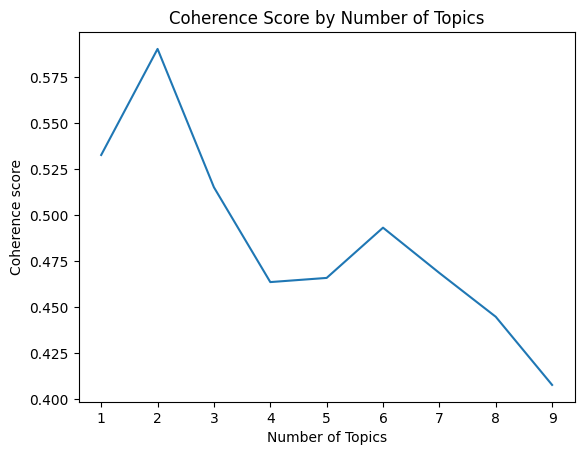

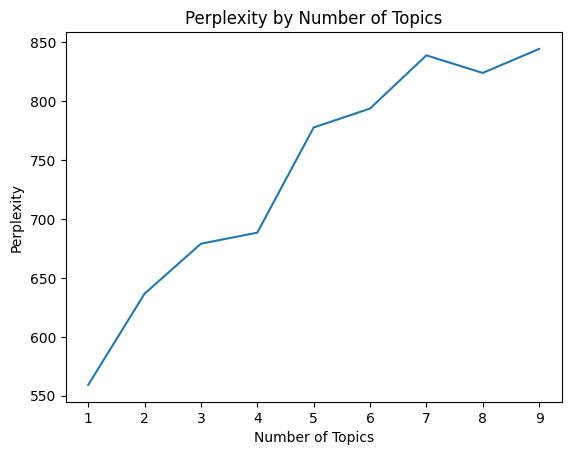

In [9]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    perplexity_values = []
    model_list = []
    
    for num_topics in range(start, limit, step):
        model = models.LdaModel(corpus=corpus,
                              id2word=dictionary,
                              num_topics=num_topics,
                              random_state=100,
                              update_every=1,
                              chunksize=100,
                              passes=10,
                              alpha='auto')
        model_list.append(model)
        
        # 计算一致性
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
        # 计算困惑度
        perplexity_values.append(np.exp(-model.log_perplexity(corpus)))
    
    return model_list, coherence_values, perplexity_values
texts=a

# 创建词典和语料库
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
# 测试主题数量从2到10
model_list, coherence_values, perplexity_values = compute_coherence_values(
    dictionary=dictionary, corpus=corpus, texts=texts, start=1, limit=10, step=1
)

# 绘制结果
import matplotlib.pyplot as plt

x = range(1, 10)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.title("Coherence Score by Number of Topics")
plt.show()

plt.plot(x, perplexity_values)
plt.xlabel("Number of Topics")
plt.ylabel("Perplexity")
plt.title("Perplexity by Number of Topics")
plt.show()

In [33]:
pd.DataFrame({"c":coherence_values},index=x)

,c
1,0.532584
2,0.590209
3,0.515045
4,0.463536
5,0.465799
6,0.493098
7,0.468492
8,0.444697
9,0.407667


In [19]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
data = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(data, 'lda_visualization.html')

In [62]:
from gensim import models
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
import numpy as np
import matplotlib.pyplot as plt
import io
def compute_coherence_values(dictionary, corpus, documents, limit, start=1, step=1):
    coherence_values = []
    perplexity_values = []
    model_list = []
    
    for num_topics in range(start, limit, step):
        model = models.LdaModel(corpus=corpus,
                              id2word=dictionary,
                              num_topics=num_topics,
                              random_state=100,
                              update_every=1,
                              chunksize=100,
                              passes=10,
                              alpha='auto')
        model_list.append(model)
        
        # 计算一致性
        coherencemodel = CoherenceModel(model=model, texts=documents, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
        # 计算困惑度
        perplexity_values.append(np.exp(-model.log_perplexity(corpus)))
    
    return model_list, coherence_values, perplexity_values
def LDA(documents):
    #输入分好词的list(将process.parse返回的数据用process.comment2tkdocs处理即可)
    dictionary = Dictionary(documents)
    corpus = [dictionary.doc2bow(text) for text in documents]
    # 测试主题数量从1到10
    model_list, coherence_values, perplexity_values = compute_coherence_values(
        dictionary=dictionary, corpus=corpus, documents=documents, start=1, limit=10, step=1
    )
    x = range(1, 10)
    fig=plt.plot(x, coherence_values)
    fig.xlabel("Number of Topics")
    fig.ylabel("Coherence score")
    fig.title("Coherence Score by Number of Topics")
    img1=io.BytesIO()
    fig.savefig(img1, format='png', bbox_inches='tight', dpi=100)
    fig.close()  # 关闭当前图形
    fig2=plt.plot(x, perplexity_values)
    fig2.xlabel("Number of Topics")
    fig2.ylabel("Perplexity")
    fig2.title("Perplexity by Number of Topics")
    img2=io.BytesIO()
    fig2.savefig(img2, format='png', bbox_inches='tight', dpi=100)
    plt.close()
    return img1,img2


AttributeError: 'list' object has no attribute 'xlabel'

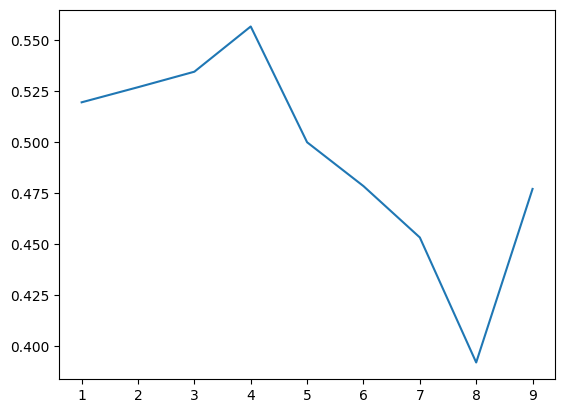

In [64]:
img1,img2=LDA(a)

In [56]:
import base64
img1=base64.b64encode(img1.getvalue()).decode('utf-8')
img2=base64.b64encode(img2.getvalue()).decode('utf-8')

In [58]:
html_content = f"""
    <!DOCTYPE html>
    <html>
    <head>
        <title>Matplotlib Plots</title>
        <style>
            .plot-container {{
                display: flex;
                justify-content: center;
                gap: 20px;
                margin-top: 30px;
            }}
            .plot {{
                border: 1px solid #ddd;
                padding: 10px;
                background: white;
                box-shadow: 0 0 10px rgba(0,0,0,0.1);
            }}
            h1 {{
                text-align: center;
                font-family: Arial, sans-serif;
                color: #333;
            }}
        </style>
    </head>
    <body>
        <h1>LDA Model Evaluation Metrics</h1>
        <div class="plot-container">
            <div class="plot">
                <img src="data:image/png;base64,{img1}" alt="Coherence Score">
            </div>
            <div class="plot">
                <img src="data:image/png;base64,{img2}" alt="Perplexity">
            </div>
        </div>
    </body>
    </html>
    """

In [60]:
with open("ldaplottest.html","w") as f:
    f.write(html_content)